In [1]:
# Start of trying to build clustering model
#Import Dependencies
import pandas as pd
import hvplot.pandas
import holoviews as hv
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [2]:
# load Trained Dataset
file_path = 'Cleaned/train.csv'
train_df = pd.read_csv(file_path)
train_df.head(10)

Customer_ID  Month   Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
0         3392      1  23.0  Scientist       19114.12            1824.843333   
1         3392      2  23.0  Scientist       19114.12            1824.843333   
2         3392      3  23.0  Scientist       19114.12            1824.843333   
3         3392      4  23.0  Scientist       19114.12            1824.843333   
4         3392      5  23.0  Scientist       19114.12            1824.843333   
5         3392      6  23.0  Scientist       19114.12            1824.843333   
6         3392      7  23.0  Scientist       19114.12            1824.843333   
7         3392      8  23.0  Scientist       19114.12            1824.843333   
8         8625      1  28.0    Teacher       34847.84            3037.986667   
9         8625      2  28.0    Teacher       34847.84            3037.986667   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0              4.0            3.0          4.0   
1              4.0            3.0          4.0   
2              4.0            3.0          4.0   
3              4.0            3.0          4.0   
4              4.0            3.0          4.0   
5              4.0            3.0          4.0   
6              4.0            3.0          4.0   
7              4.0            3.0          4.0   
8              4.0            6.0          1.0   
9              4.0            6.0          1.0   

                                        Type_of_Loan  ...  \
0  auto loan,credit-builder loan,personal loan,ho...  ...   
1  auto loan,credit-builder loan,personal loan,ho...  ...   
2  auto loan,credit-builder loan,personal loan,ho...  ...   
3  auto loan,credit-builder loan,personal loan,ho...  ...   
4  auto loan,credit-builder loan,personal loan,ho...  ...   
5  auto loan,credit-builder loan,personal loan,ho...  ...   
6  auto loan,credit-builder loan,personal loan,ho...  ...   
7  auto loan,credit-builder loan,personal loan,ho...  ...   
8                                credit-builder loan  ...   
9                                credit-builder loan  ...   

   Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
0                   4.0        Good            809.98   
1                   4.0        Good            809.98   
2                   4.0        Good            809.98   
3                   4.0        Good            809.98   
4                   4.0        Good            809.98   
5                   4.0        Good            809.98   
6                   4.0        Good            809.98   
7                   4.0        Good            809.98   
8                   2.0        Good            605.03   
9                   2.0        Good            605.03   

  Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
0                26.822620               265.0                     No   
1                31.944960               266.0                     No   
2                28.609352               267.0                     No   
3                31.377862               268.0                     No   
4                24.797347               269.0                     No   
5                27.262259               270.0                     No   
6                22.537593               271.0                     No   
7                23.933795               272.0                     No   
8                24.464031               319.0                     No   
9                38.550848               320.0                     No   

   Total_EMI_per_month                 Payment_Behaviour  Monthly_Balance  \
0            49.574949   High_spent_Small_value_payments       312.494089   
1            49.574949    Low_spent_Large_value_payments       284.629162   
2            49.574949   Low_spent_Medium_value_payments       331.209863   
3            49.574949    Low_spent_Small_value_payments       223.451310   
4            49.574949  High_spent_Medium_value_payments       341.489231   
5    

In [3]:
train_df.dtypes

Customer_ID                   int64
Month                         int64
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

In [4]:
# DATA SET IS ALREADY PRE CLEANED

In [5]:
# Generate summary statistics
train_df.describe()

Customer_ID          Month            Age  Annual_Income  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    25982.666640       4.500000      33.316340   50505.123449   
std     14340.543051       2.291299      10.764812   38299.422093   
min      1006.000000       1.000000      14.000000    7005.930000   
25%     13664.500000       2.750000      24.000000   19342.972500   
50%     25777.000000       4.500000      33.000000   36999.705000   
75%     38385.000000       6.250000      42.000000   71683.470000   
max     50999.000000       8.000000      56.000000  179987.280000   

       Monthly_Inhand_Salary  Num_Credit_Card  Interest_Rate    Num_of_Loan  \
count          100000.000000    100000.000000   100000.00000  100000.000000   
mean             4197.270835         5.533570       14.53208       3.532880   
std              3186.432497         2.067098        8.74133       2.446356   
min               303.645417         0.000000        1.00000       0.000000   
25%              1626.594167         4.000000        7.00000       2.000000   
50%              3095.905000         5.000000       13.00000       3.000000   
75%              5957.715000         7.000000       20.00000       5.000000   
max             15204.633333        11.000000       34.00000       9.000000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count           100000.000000         100000.000000         100000.000000   
mean                13.300830             10.470323              5.798250   
std                  6.263811              6.609481              3.867826   
min                 -2.000000              0.500000              0.000000   
25%                  9.000000              5.380000              3.000000   
50%                 14.000000              9.400000              5.000000   
75%                 18.000000             14.850000              8.000000   
max                 25.000000             29.980000             17.000000   

       Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
count     100000.000000             100000.000000       100000.000000   
mean        1426.220376                 32.285173          221.220460   
std         1155.129026                  5.116875           99.680716   
min            0.230000                 20.000000            1.000000   
25%          566.072500                 28.052567          144.000000   
50%         1166.155000                 32.305784          219.000000   
75%         1945.962500                 36.496663          302.000000   
max         4998.070000                 50.000000          404.000000   

       Total_EMI_per_month  Monthly_Balance  
count        100000.000000     1.000000e+05  
mean            107.699208    -3.333333e+22  
std             132.267056     3.333183e+24  
min               0.000000    -3.333333e+26  
25%              29.268886     2.676118e+02  
50%              66.462304     3.338603e+02  
75%             147.392573     4.632157e+02  
max            1779.103254     1.183931e+03

In [6]:
#columns_to_remove = ["Credit_Score", "Customer_ID", "Type_of_Loan"]
#train_df = train_df.drop(columns=columns_to_remove)

In [7]:
# Drop columns
X_df = train_df.drop(columns=["Credit_Score", "Customer_ID", "Type_of_Loan"], axis=1, inplace=False)


In [8]:
X_df.head()

Month   Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      1  23.0  Scientist       19114.12            1824.843333   
1      2  23.0  Scientist       19114.12            1824.843333   
2      3  23.0  Scientist       19114.12            1824.843333   
3      4  23.0  Scientist       19114.12            1824.843333   
4      5  23.0  Scientist       19114.12            1824.843333   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Num_of_Delayed_Payment  \
0              4.0            3.0          4.0                     7.0   
1              4.0            3.0          4.0                     4.0   
2              4.0            3.0          4.0                     7.0   
3              4.0            3.0          4.0                     4.0   
4              4.0            3.0          4.0                     4.0   

   Changed_Credit_Limit  Num_Credit_Inquiries Credit_Mix  Outstanding_Debt  \
0                 11.27                   4.0       Good            809.98   
1                 11.27                   4.0       Good            809.98   
2                 11.27                   4.0       Good            809.98   
3                  6.27                   4.0       Good            809.98   
4                 11.27                   4.0       Good            809.98   

   Credit_Utilization_Ratio  Credit_History_Age Payment_of_Min_Amount  \
0                 26.822620               265.0                    No   
1                 31.944960               266.0                    No   
2                 28.609352               267.0                    No   
3                 31.377862               268.0                    No   
4                 24.797347               269.0                    No   

   Total_EMI_per_month                 Payment_Behaviour  Monthly_Balance  
0            49.574949   High_spent_Small_value_payments       312.494089  
1            49.574949    Low_spent_Large_value_payments       284.629162  
2            49.574949   Low_spent_Medium_value_payments       331.209863  
3            49.574949    Low_spent_Small_value_payments       223.451310  
4            49.574949  High_spent_Medium_value_payments       341.489231

In [ ]:
#y = train_df["Credit_Score"]

In [9]:
pd.get_dummies(X_df, drop_first=True)


Month   Age  Annual_Income  Monthly_Inhand_Salary  Num_Credit_Card  \
0          1  23.0       19114.12            1824.843333              4.0   
1          2  23.0       19114.12            1824.843333              4.0   
2          3  23.0       19114.12            1824.843333              4.0   
3          4  23.0       19114.12            1824.843333              4.0   
4          5  23.0       19114.12            1824.843333              4.0   
...      ...   ...            ...                    ...              ...   
99995      4  25.0       39628.99            3359.415833              6.0   
99996      5  25.0       39628.99            3359.415833              6.0   
99997      6  25.0       39628.99            3359.415833              6.0   
99998      7  25.0       39628.99            3359.415833              6.0   
99999      8  25.0       39628.99            3359.415833              6.0   

       Interest_Rate  Num_of_Loan  Num_of_Delayed_Payment  \
0                3.0          4.0                     7.0   
1                3.0          4.0                     4.0   
2                3.0          4.0                     7.0   
3                3.0          4.0                     4.0   
4                3.0          4.0                     4.0   
...              ...          ...                     ...   
99995            7.0          2.0                     7.0   
99996            7.0          2.0                     7.0   
99997            7.0          2.0                     6.0   
99998            7.0          2.0                     6.0   
99999            7.0          2.0                     6.0   

       Changed_Credit_Limit  Num_Credit_Inquiries  ...  Occupation_Writer  \
0                     11.27                   4.0  ...              False   
1                     11.27                   4.0  ...              False   
2                     11.27                   4.0  ...              False   
3                      6.27                   4.0  ...              False   
4                     11.27                   4.0  ...              False   
...                     ...                   ...  ...                ...   
99995                 11.50                   3.0  ...              False   
99996                 11.50                   3.0  ...              False   
99997                 11.50                   3.0  ...              False   
99998                 11.50                   3.0  ...              False   
99999                 11.50                   3.0  ...              False   

       Credit_Mix_Good  Credit_Mix_Standard  Payment_of_Min_Amount_No  \
0                 True                False                      True   
1                 True                False                      True   
2                 True                False                      True   
3                 True                False                      True   
4                 True                False                      True   
...                ...                  ...                       ...   
99995             True                False                      True   
99996             True                False                      True   
99997             True                False                      True   
99998             True                False                      True   
99999             True                False                      True   

       Payment_of_Min_Amount_Yes  \
0                          False   
1                          False   
2                          False   
3                          False   
4                          False   
...                          ...   
99995                      False   
99996                      False   
99997                      False   
99998                      False   
99999                      False   

       Payment_Behaviour_High_spent_Medium_value_payments  \
0                                                  Fa

In [11]:
X_dummies = pd.get_dummies(X_df, drop_first=True)

In [13]:
#
train_scaled = StandardScaler().fit_transform(X_dummies)
train_scaled

array([[-1.52752523, -0.95834391, -0.81962491, ..., -0.34842948,
        -0.41289282, -0.62907222],
       [-1.09108945, -0.95834391, -0.81962491, ...,  2.87002125,
        -0.41289282, -0.62907222],
       [-0.65465367, -0.95834391, -0.81962491, ..., -0.34842948,
         2.42193603, -0.62907222],
       ...,
       [ 0.65465367, -0.77255245, -0.28397786, ..., -0.34842948,
        -0.41289282, -0.62907222],
       [ 1.09108945, -0.77255245, -0.28397786, ...,  2.87002125,
        -0.41289282, -0.62907222],
       [ 1.52752523, -0.77255245, -0.28397786, ..., -0.34842948,
        -0.41289282,  1.58964261]])

In [16]:
print(X_dummies.columns)

Index(['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Monthly_Balance',
       'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Good', 'Credit_Mix_Standard',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Paymen

In [17]:
train_new = pd.DataFrame(train_scaled, columns=['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Monthly_Balance',
       'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Good', 'Credit_Mix_Standard',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments'])

In [18]:
train_new

Month       Age  Annual_Income  Monthly_Inhand_Salary  \
0     -1.527525 -0.958344      -0.819625              -0.744544   
1     -1.091089 -0.958344      -0.819625              -0.744544   
2     -0.654654 -0.958344      -0.819625              -0.744544   
3     -0.218218 -0.958344      -0.819625              -0.744544   
4      0.218218 -0.958344      -0.819625              -0.744544   
...         ...       ...            ...                    ...   
99995 -0.218218 -0.772552      -0.283978              -0.262946   
99996  0.218218 -0.772552      -0.283978              -0.262946   
99997  0.654654 -0.772552      -0.283978              -0.262946   
99998  1.091089 -0.772552      -0.283978              -0.262946   
99999  1.527525 -0.772552      -0.283978              -0.262946   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Num_of_Delayed_Payment  \
0            -0.741899      -1.319266     0.190946               -1.005915   
1            -0.741899      -1.319266     0.190946               -1.484859   
2            -0.741899      -1.319266     0.190946               -1.005915   
3            -0.741899      -1.319266     0.190946               -1.484859   
4            -0.741899      -1.319266     0.190946               -1.484859   
...                ...            ...          ...                     ...   
99995         0.225646      -0.861667    -0.626600               -1.005915   
99996         0.225646      -0.861667    -0.626600               -1.005915   
99997         0.225646      -0.861667    -0.626600               -1.165563   
99998         0.225646      -0.861667    -0.626600               -1.165563   
99999         0.225646      -0.861667    -0.626600               -1.165563   

       Changed_Credit_Limit  Num_Credit_Inquiries  ...  Occupation_Writer  \
0                  0.120990             -0.464928  ...          -0.259387   
1                  0.120990             -0.464928  ...          -0.259387   
2                  0.120990             -0.464928  ...          -0.259387   
3                 -0.635503             -0.464928  ...          -0.259387   
4                  0.120990             -0.464928  ...          -0.259387   
...                     ...                   ...  ...                ...   
99995              0.155789             -0.723472  ...          -0.259387   
99996              0.155789             -0.723472  ...          -0.259387   
99997              0.155789             -0.723472  ...          -0.259387   
99998              0.155789             -0.723472  ...          -0.259387   
99999              0.155789             -0.723472  ...          -0.259387   

       Credit_Mix_Good  Credit_Mix_Standard  Payment_of_Min_Amount_No  \
0              1.52021            -0.914464                  1.343023   
1              1.52021            -0.914464                  1.343023   
2              1.52021            -0.914464                  1.343023   
3              1.52021            -0.914464                  1.343023   
4              1.52021            -0.914464                  1.343023   
...                ...                  ...                       ...   
99995          1.52021            -0.914464                  1.343023   
99996          1.52021            -0.914464                  1.343023   
99997          1.52021            -0.914464                  1.343023   
99998          1.52021            -0.914464                  1.343023   
99999          1.52021            -0.914464                  1.343023   

       Payment_of_Min_Amount_Yes  \
0                      -1.047654   
1                      -1.047654   
2                      -1.047654   
3                      -1.047654   
4                      -1.047654   
...                          ...   
99995                  -1.047654   
99996                  -1.047654   
99997                  -1.047654   
99998                  -1.047654   
99999                  -1.047654   

       Payment_Behaviour_High_spe

In [19]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,12))
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [21]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(train_new)
    inertia_values.append(k_model.inertia_)

/Users/terrycleek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/terrycleek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/terrycleek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/terrycleek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init

In [22]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)
elbow_df

k       inertia
0    1  3.800000e+06
1    2  3.285714e+06
2    3  3.086329e+06
3    4  2.999446e+06
4    5  2.936991e+06
5    6  2.885416e+06
6    7  2.788232e+06
7    8  2.775026e+06
8    9  2.676062e+06
9   10  2.638359e+06
10  11  2.577447e+06

In [41]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

elbow_plot = elbow_df.hvplot.line(
    x="k",
    y="inertia",
    title= "Elbow Curve",
    xticks=k
)
elbow_plot

:Curve   [k]   (inertia)

In [24]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3, random_state=1)

In [26]:
# Fit the K-Means model using the scaled data
model.fit(train_new)

/Users/terrycleek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=1)

In [28]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_3 = model.predict(train_new)

# Print the resulting array of cluster values.
k_3

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [29]:
# Create a copy of the DataFrame
clusters_predicted = train_new.copy()

In [30]:
# Add a new column to the DataFrame with the predicted clusters
clusters_predicted['predicted_clusters'] = k_3

# Display sample data
clusters_predicted.head()

Month       Age  Annual_Income  Monthly_Inhand_Salary  Num_Credit_Card  \
0 -1.527525 -0.958344      -0.819625              -0.744544        -0.741899   
1 -1.091089 -0.958344      -0.819625              -0.744544        -0.741899   
2 -0.654654 -0.958344      -0.819625              -0.744544        -0.741899   
3 -0.218218 -0.958344      -0.819625              -0.744544        -0.741899   
4  0.218218 -0.958344      -0.819625              -0.744544        -0.741899   

   Interest_Rate  Num_of_Loan  Num_of_Delayed_Payment  Changed_Credit_Limit  \
0      -1.319266     0.190946               -1.005915              0.120990   
1      -1.319266     0.190946               -1.484859              0.120990   
2      -1.319266     0.190946               -1.005915              0.120990   
3      -1.319266     0.190946               -1.484859             -0.635503   
4      -1.319266     0.190946               -1.484859              0.120990   

   Num_Credit_Inquiries  ...  Credit_Mix_Good  Credit_Mix_Standard  \
0             -0.464928  ...          1.52021            -0.914464   
1             -0.464928  ...          1.52021            -0.914464   
2             -0.464928  ...          1.52021            -0.914464   
3             -0.464928  ...          1.52021            -0.914464   
4             -0.464928  ...          1.52021            -0.914464   

   Payment_of_Min_Amount_No  Payment_of_Min_Amount_Yes  \
0                  1.343023                  -1.047654   
1                  1.343023                  -1.047654   
2                  1.343023                  -1.047654   
3                  1.343023                  -1.047654   
4                  1.343023                  -1.047654   

   Payment_Behaviour_High_spent_Medium_value_payments  \
0                                          -0.485753    
1                                          -0.485753    
2                                          -0.485753    
3                                          -0.485753    
4                                           2.058657    

   Payment_Behaviour_High_spent_Small_value_payments  \
0                                           2.738046   
1                                          -0.365224   
2                                          -0.365224   
3                                          -0.365224   
4                                          -0.365224   

   Payment_Behaviour_Low_spent_Large_value_payments  \
0                                         -0.348429   
1                                          2.870021   
2                                         -0.348429   
3                                         -0.348429   
4                                         -0.348429   

   Payment_Behaviour_Low_spent_Medium_value_payments  \
0                                          -0.412893   
1                                          -0.412893   
2                                           2.421936   
3                                          -0.412893   
4                                          -0.412893   

   Payment_Behaviour_Low_spent_Small_value_payments  predicted_clusters  
0                                         -0.629072                   1  
1                                         -0.629072                   1  
2                                         -0.629072                   1  
3                                          1.589643                   1  
4                                         -0.629072                   1  

[5 rows x 39 columns]

In [38]:
for cluster in model.cluster_centers_:
    print("Next Cluster:")
    clusterData = zip(train_new.columns,cluster)
    for c in clusterData:
        print(c)


Next Cluster:
('Month', -0.006965561455126398)
('Age', 0.010012340321847335)
('Annual_Income', -0.0021521941768668624)
('Monthly_Inhand_Salary', -0.001496752342722138)
('Num_Credit_Card', -0.2614745256868082)
('Interest_Rate', -0.1841291116316896)
('Num_of_Loan', -0.31126159532559217)
('Num_of_Delayed_Payment', 0.11121359813705353)
('Changed_Credit_Limit', 0.0791174689047478)
('Num_Credit_Inquiries', -0.24440177337884916)
('Outstanding_Debt', -0.4669903209452864)
('Credit_Utilization_Ratio', 0.0008816996635956727)
('Credit_History_Age', 0.20414992742822374)
('Total_EMI_per_month', -0.10085367949613427)
('Monthly_Balance', 0.0021055761901019312)
('Occupation_Architect', 0.024296199692693924)
('Occupation_Developer', -0.0014364999633386785)
('Occupation_Doctor', 0.004471611642108595)
('Occupation_Engineer', -0.017733652044766554)
('Occupation_Entrepreneur', -0.014715295055100247)
('Occupation_Journalist', 0.009502930953419376)
('Occupation_Lawyer', 0.012344807091909158)
('Occupation_Mana

In [62]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
clusters_predicted.hvplot.scatter(
x="Outstanding_Debt",
y="Interest_Rate",
by="predicted_clusters",
)

:NdOverlay   [predicted_clusters]
   :Scatter   [Outstanding_Debt]   (Interest_Rate)

In [63]:
#Create a PCA Model
# Create a PCA model instance and set `n_components=5`.
pca = PCA(n_components=5)

In [64]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
clusters_pca = pca.fit_transform(clusters_predicted)
# View the first five rows of the DataFrame. 
clusters_pca[:5]

array([[-1.96045868, -0.25021134, -2.03416432, -1.17514794,  0.81972356],
       [-2.14918466, -0.20431988, -2.00752848, -0.88224324,  2.51708065],
       [-2.00025888, -0.03975914, -1.90985517, -1.72950162,  0.04324011],
       [-2.143256  , -0.63480076, -2.66603397,  0.60232906, -0.3270636 ],
       [-2.13059585, -0.03077742, -1.86182107,  1.36385711,  1.17706941]])

In [65]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.17428966, 0.0608257 , 0.05465182, 0.03103598, 0.02929896])

In [66]:
explained_variance = np.array([0.17428966, 0.0608257 , 0.05465182, 0.03103598, 0.02929896])
total_explained_variance = np.sum(explained_variance)
total_explained_variance

0.35010212

In [69]:
%pip install seaborn
import seaborn as sns
sns.set(font_scale=0.6)

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 4.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 10))

<Figure size 5000x1000 with 0 Axes>

<Figure size 5000x1000 with 0 Axes>

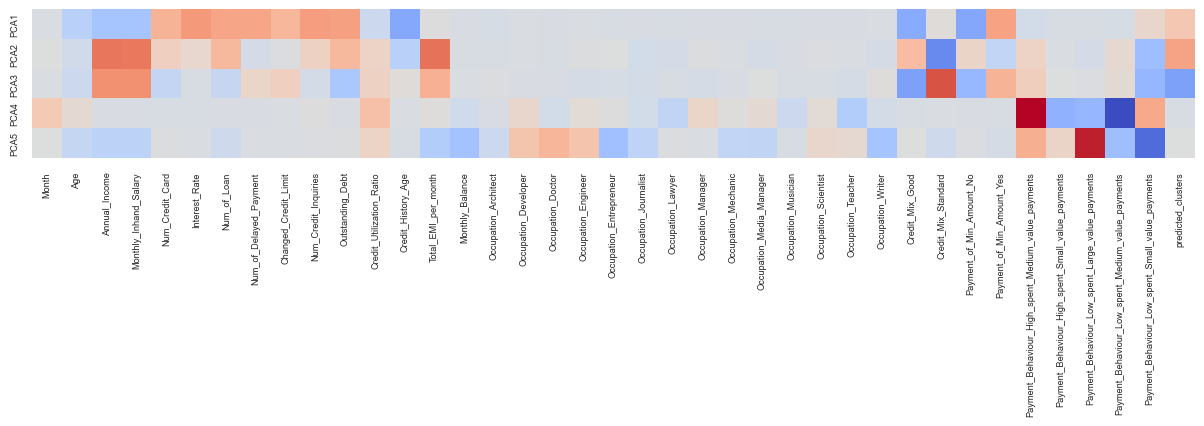

In [93]:
plt.figure(figsize=(15, 10))
import seaborn as sns
sns.set(font_scale=0.6)
ax = sns.heatmap(pca.components_,
                 cmap='coolwarm',
                 cbar=False,
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(pca.feature_names_in_),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")


In [94]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data
clusters_pca_df = pd.DataFrame(
    clusters_pca,
    columns = ["PCA1", "PCA2", "PCA3", "PCA4", "PCA5"]
)



# Display sample data
clusters_pca_df

PCA1      PCA2      PCA3      PCA4      PCA5
0     -1.960459 -0.250211 -2.034164 -1.175148  0.819724
1     -2.149185 -0.204320 -2.007528 -0.882243  2.517081
2     -2.000259 -0.039759 -1.909855 -1.729502  0.043240
3     -2.143256 -0.634801 -2.666034  0.602329 -0.327064
4     -2.130596 -0.030777 -1.861821  1.363857  1.177069
...         ...       ...       ...       ...       ...
99995 -2.577763 -0.003023 -1.490056  0.038738  0.034719
99996 -2.702032  0.362536 -1.067169  1.852921  0.755333
99997 -2.692407  0.138583 -1.364743  0.424411  0.183992
99998 -2.617923 -0.062468 -1.481171 -0.568834  1.886344
99999 -2.458163 -0.464272 -2.037897  0.891548 -0.943017

[100000 rows x 5 columns]

In [95]:
# Find best value for K using PCA data
# Create a list with the number of k-values from 1 to 11
k = list(range(1,12))
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [96]:
# Create an empty list to store the inertia values
inertia2 = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `clusters_pca_df` *changed*
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(clusters_pca_df)
    inertia2.append(k_model.inertia_)

/Users/terrycleek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/terrycleek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/terrycleek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/terrycleek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init

In [97]:
# Create a dictionary with the data to plot the Elbow curve
elbow_curve2 = {"k": k, "inertia": inertia2}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df2 = pd.DataFrame(elbow_curve2)
elbow_df2

k       inertia
0    1  1.354427e+06
1    2  8.360670e+05
2    3  5.796291e+05
3    4  5.013151e+05
4    5  4.482102e+05
5    6  4.127720e+05
6    7  3.846894e+05
7    8  3.584090e+05
8    9  3.380235e+05
9   10  3.192816e+05
10  11  3.021343e+05

In [98]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = elbow_df.hvplot.line(
    x="k",
    y="inertia",
    title= "Elbow Curve",
    xticks=k
)
elbow_plot

:Curve   [k]   (inertia)

In [99]:
# Initialize the K-Means model using the best value for k
model =KMeans(n_clusters=3, random_state=1)

In [100]:
# Fit the K-Means model using the PCA data
model.fit(clusters_pca_df)

/Users/terrycleek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=1)

In [101]:
# Predict the clusters to group using the PCA data
k_3_new = model.predict(clusters_pca_df)
# Print the resulting array of cluster values.
k_3_new

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [102]:
# Create a copy of the DataFrame with the PCA data
copy_clusters_pca_df= clusters_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
copy_clusters_pca_df['predicted_cluster'] = k_3_new

# Display sample data
copy_clusters_pca_df

PCA1      PCA2      PCA3      PCA4      PCA5  predicted_cluster
0     -1.960459 -0.250211 -2.034164 -1.175148  0.819724                  1
1     -2.149185 -0.204320 -2.007528 -0.882243  2.517081                  1
2     -2.000259 -0.039759 -1.909855 -1.729502  0.043240                  1
3     -2.143256 -0.634801 -2.666034  0.602329 -0.327064                  1
4     -2.130596 -0.030777 -1.861821  1.363857  1.177069                  1
...         ...       ...       ...       ...       ...                ...
99995 -2.577763 -0.003023 -1.490056  0.038738  0.034719                  1
99996 -2.702032  0.362536 -1.067169  1.852921  0.755333                  1
99997 -2.692407  0.138583 -1.364743  0.424411  0.183992                  1
99998 -2.617923 -0.062468 -1.481171 -0.568834  1.886344                  1
99999 -2.458163 -0.464272 -2.037897  0.891548 -0.943017                  1

[100000 rows x 6 columns]

In [103]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
copy_clusters_pca_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by = 'predicted_cluster'
)

:NdOverlay   [predicted_cluster]
   :Scatter   [PCA1]   (PCA2)

In [104]:
# Composite plot to contrast the Elbow curves
elbow_df.hvplot.line(x="k", y="inertia", title= "Elbow Curve 1", xticks=k) + elbow_df2.hvplot.line(x="k", y="inertia", title="Elbow Curve 2", xticks=k)

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [107]:
# Composite plot to contrast the clusters
clusters_predicted.hvplot.scatter(
x="Outstanding_Debt",
y="Interest_Rate",
by="predicted_clusters",
) + copy_clusters_pca_df.hvplot.scatter(x="PCA1", y="PCA2", by = 'predicted_cluster')

:Layout
   .NdOverlay.I  :NdOverlay   [predicted_clusters]
      :Scatter   [Outstanding_Debt]   (Interest_Rate)
   .NdOverlay.II :NdOverlay   [predicted_cluster]
      :Scatter   [PCA1]   (PCA2)